In [1]:
# Import necessary libraries
import torch
import torch.nn as nn
import torch.optim as optim
import torchvision
import torchvision.transforms as transforms
from torch.utils.data import DataLoader
import matplotlib.pyplot as plt
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix
import seaborn as sns
import numpy as np

In [2]:
# Set device (GPU if available, else CPU)
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')

# Define the transformations (Normalization)
transform = transforms.Compose([
    transforms.ToTensor(),
    transforms.Normalize((0.5,), (0.5,))  # Normalize the dataset to range [-1, 1]
])

In [3]:
# Load the MNIST dataset
train_dataset = torchvision.datasets.MNIST(root='./data', train=True, download=True, transform=transform)
test_dataset = torchvision.datasets.MNIST(root='./data', train=False, download=True, transform=transform)

train_loader = DataLoader(dataset=train_dataset, batch_size=64, shuffle=True)
test_loader = DataLoader(test_dataset, batch_size=64, shuffle=False)


# Visualize some images (Optional)
dataiter = iter(train_loader)
images, labels = next(dataiter)


In [4]:
# Define the neural network model
class ANN(nn.Module):
    def __init__(self):
        super(ANN, self).__init__()
        # Define the layers
        self.fc1 = nn.Linear(28*28, 128)  # Input layer → 128 hidden units
        self.fc2 = nn.Linear(128, 64)     # 128 → 64 hidden units
        self.fc3 = nn.Linear(64, 10)      # 64 → 10 output classes

    def forward(self, x):
        # Forward pass
        x = x.view(-1, 28*28)       # Flatten the image (batch_size, 784)
        x = torch.relu(self.fc1(x)) # First fully connected layer + ReLU
        x = torch.relu(self.fc2(x)) # Second fully connected layer + ReLU
        x = self.fc3(x)             # Output layer (logits for 10 classes)
        return x


In [5]:
# Initialize the model, loss function, and optimizer
model = ANN().to(device)
criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(model.parameters(), lr=0.001)

In [6]:
# Training the network (fixed)
num_epochs = 5  # choose appropriate number of epochs (try 5, 10, 20...)
ls_losses = []

model.train()  # set model to training mode
for epoch in range(num_epochs):
    for i, (images, labels) in enumerate(train_loader):
        # Move images and labels to the device and flatten images
        images = images.to(device).view(-1, 28*28)  # (batch_size, 784)
        labels = labels.to(device)

        # Forward pass
        outputs = model(images)              # model forward
        loss = criterion(outputs, labels)    # compute loss
        ls_losses.append(loss.item())        # store scalar loss

        # Backward and optimize
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()

        if (i+1) % 100 == 0:
            print(f'Epoch [{epoch+1}/{num_epochs}], Step [{i+1}/{len(train_loader)}], Loss: {loss.item():.4f}')


Epoch [1/5], Step [100/938], Loss: 0.5427
Epoch [1/5], Step [200/938], Loss: 0.4350
Epoch [1/5], Step [300/938], Loss: 0.7596
Epoch [1/5], Step [400/938], Loss: 0.3009
Epoch [1/5], Step [500/938], Loss: 0.3542
Epoch [1/5], Step [600/938], Loss: 0.2765
Epoch [1/5], Step [700/938], Loss: 0.5101
Epoch [1/5], Step [800/938], Loss: 0.1266
Epoch [1/5], Step [900/938], Loss: 0.3945
Epoch [2/5], Step [100/938], Loss: 0.4800
Epoch [2/5], Step [200/938], Loss: 0.1805
Epoch [2/5], Step [300/938], Loss: 0.2162
Epoch [2/5], Step [400/938], Loss: 0.2811
Epoch [2/5], Step [500/938], Loss: 0.0691
Epoch [2/5], Step [600/938], Loss: 0.1889
Epoch [2/5], Step [700/938], Loss: 0.1071
Epoch [2/5], Step [800/938], Loss: 0.0417
Epoch [2/5], Step [900/938], Loss: 0.0900
Epoch [3/5], Step [100/938], Loss: 0.1213
Epoch [3/5], Step [200/938], Loss: 0.0632
Epoch [3/5], Step [300/938], Loss: 0.1051
Epoch [3/5], Step [400/938], Loss: 0.0571
Epoch [3/5], Step [500/938], Loss: 0.1897
Epoch [3/5], Step [600/938], Loss:

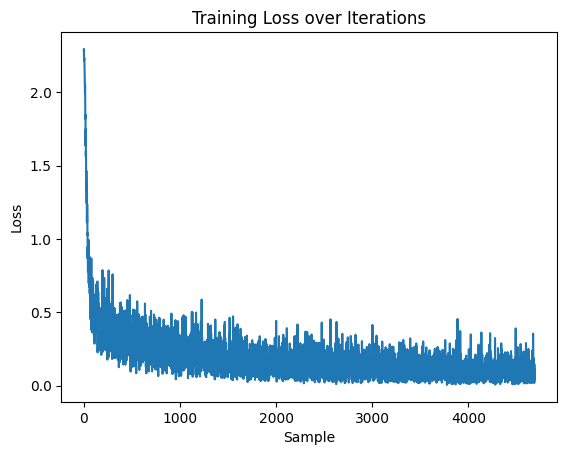

In [7]:
# Plot Losses
x_axis = np.arange(0, len(ls_losses), 1)
plt.plot(x_axis, ls_losses)
plt.xlabel("Sample")  # use parentheses, not assignment
plt.ylabel("Loss")
plt.title("Training Loss over Iterations")
plt.show()


In [8]:
# Testing the model
model.eval()  # Set the model to evaluation mode
all_preds = []
all_labels = []

with torch.no_grad():
    correct = 0
    total = 0
    for images, labels in test_loader:
        # Move images and labels to the device
        images = images.to(device).view(-1, 28*28)  # Flatten each image
        labels = labels.to(device)

        # Forward pass through the model
        outputs = model(images)
        _, predicted = torch.max(outputs.data, 1)  # Get the class with highest score

        total += labels.size(0)
        correct += (predicted == labels).sum().item()

        # Append predictions and labels for metrics
        all_preds.extend(predicted.cpu().numpy())  # move to CPU and convert to numpy
        all_labels.extend(labels.cpu().numpy())    # move to CPU and convert to numpy

    print(f'Accuracy of the network on the test images: {100 * correct / total:.2f}%')


Accuracy of the network on the test images: 97.09%


Accuracy: 97.09%
Precision: 0.9707
Recall: 0.9707
F1-Score: 0.9706


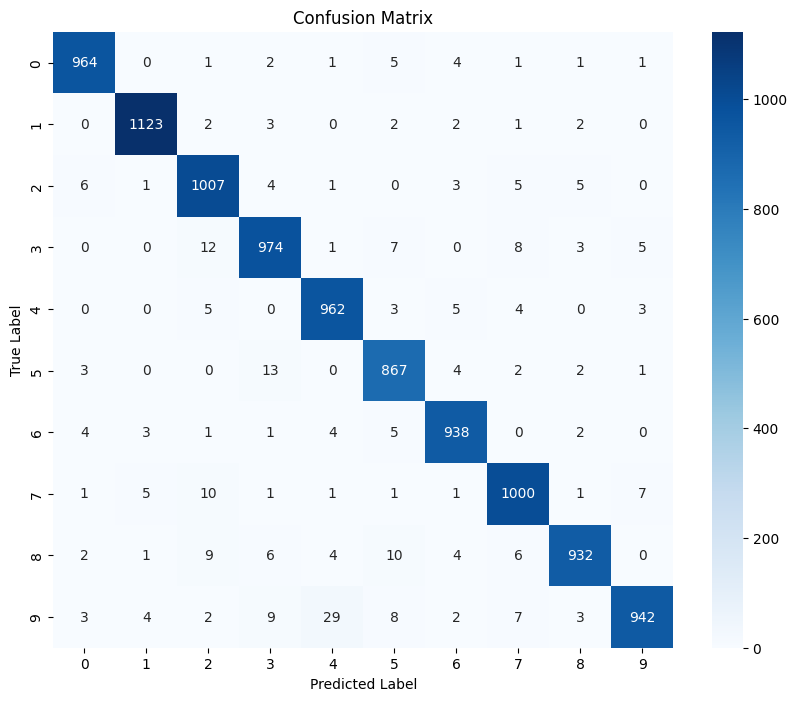

In [9]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

# TODO: Convert predictions and labels to numpy arrays for metric calculation
all_preds = np.array(all_preds)  # Convert list or tensor to numpy array
all_labels = np.array(all_labels)

# Calculate accuracy, precision, recall, and F1-score
# TODO: Use sklearn to calculate accuracy, precision, recall, and F1-score
accuracy = accuracy_score(all_labels, all_preds)
precision = precision_score(all_labels, all_preds, average='macro')  # 'macro' for equal class weighting
recall = recall_score(all_labels, all_preds, average='macro')
f1 = f1_score(all_labels, all_preds, average='macro')

print(f'Accuracy: {accuracy * 100:.2f}%')
print(f'Precision: {precision:.4f}')
print(f'Recall: {recall:.4f}')
print(f'F1-Score: {f1:.4f}')

# TODO: Confusion matrix calculation
conf_matrix = confusion_matrix(all_labels, all_preds)

plt.figure(figsize=(10, 8))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=range(10), yticklabels=range(10))
plt.title('Confusion Matrix')
plt.ylabel('True Label')
plt.xlabel('Predicted Label')
plt.show()

In [11]:
# -----------------------------
# Hyperparameter tuning cell (replace your current cell with this)
# -----------------------------
import torch
from torch.utils.data import DataLoader
import numpy as np

# Define hyperparameters to tune (reasonable small grid to avoid very long runs)
param_grid = {
    'learning_rate': [1e-3, 5e-4],
    'batch_size': [32, 64, 128],
    'num_epochs': [5, 10]
}

best_accuracy = 0.0
best_params = {}
results = []  # collect (lr, bs, epochs, accuracy) for later analysis

# Optional: fix seed for reproducibility
torch.manual_seed(42)
if torch.cuda.is_available():
    torch.cuda.manual_seed_all(42)

for lr in param_grid['learning_rate']:
    for bs in param_grid['batch_size']:
        for epochs in param_grid['num_epochs']:
            print(f"\nTraining with LR: {lr}, Batch Size: {bs}, Epochs: {epochs}")

            # Re-initialize model, loss, and optimizer
            model = ANN().to(device)
            criterion = nn.CrossEntropyLoss()
            optimizer = optim.Adam(model.parameters(), lr=lr)

            # Update DataLoader with new batch size
            train_loader = DataLoader(dataset=train_dataset, batch_size=bs, shuffle=True)
            test_loader = DataLoader(dataset=test_dataset, batch_size=bs, shuffle=False)

            # Training loop
            model.train()
            for epoch in range(epochs):
                running_loss = 0.0
                for i, (images, labels) in enumerate(train_loader):
                    images = images.to(device).view(images.size(0), -1)  # flatten
                    labels = labels.to(device)

                    outputs = model(images)
                    loss = criterion(outputs, labels)

                    optimizer.zero_grad()
                    loss.backward()
                    optimizer.step()

                    running_loss += loss.item()

                avg_loss = running_loss / len(train_loader)
                print(f"  Epoch [{epoch+1}/{epochs}] - Avg Loss: {avg_loss:.4f}")

            # Evaluation loop on test set
            model.eval()
            with torch.no_grad():
                correct = 0
                total = 0
                for images, labels in test_loader:
                    images = images.to(device).view(images.size(0), -1)
                    labels = labels.to(device)
                    outputs = model(images)
                    _, predicted = torch.max(outputs.data, 1)
                    total += labels.size(0)
                    correct += (predicted == labels).sum().item()

                accuracy = 100.0 * correct / total  # percent
                print(f'  -> Accuracy for LR: {lr}, Batch Size: {bs}, Epochs: {epochs}: {accuracy:.2f}%')

                # Store results
                results.append({'lr': lr, 'batch_size': bs, 'epochs': epochs, 'accuracy': accuracy})

                # Update best
                if accuracy > best_accuracy:
                    best_accuracy = accuracy
                    best_params = {'learning_rate': lr, 'batch_size': bs, 'num_epochs': epochs}

# Summary
print("\nBest Hyperparameters:")
print(best_params)
print(f"Best Accuracy: {best_accuracy:.2f}%")

# Optional: convert results to numpy/pandas for easier visualization
try:
    import pandas as pd
    df_results = pd.DataFrame(results).sort_values('accuracy', ascending=False)
    display(df_results.head(10))
except Exception:
    # If pandas isn't available, just print the top 5 results
    top_results = sorted(results, key=lambda x: x['accuracy'], reverse=True)[:5]
    print("\nTop results:")
    for r in top_results:
        print(r)



Training with LR: 0.001, Batch Size: 32, Epochs: 5
  Epoch [1/5] - Avg Loss: 0.3373
  Epoch [2/5] - Avg Loss: 0.1597
  Epoch [3/5] - Avg Loss: 0.1227
  Epoch [4/5] - Avg Loss: 0.1031
  Epoch [5/5] - Avg Loss: 0.0894
  -> Accuracy for LR: 0.001, Batch Size: 32, Epochs: 5: 96.10%

Training with LR: 0.001, Batch Size: 32, Epochs: 10
  Epoch [1/10] - Avg Loss: 0.3432
  Epoch [2/10] - Avg Loss: 0.1668
  Epoch [3/10] - Avg Loss: 0.1268
  Epoch [4/10] - Avg Loss: 0.1034
  Epoch [5/10] - Avg Loss: 0.0917
  Epoch [6/10] - Avg Loss: 0.0786
  Epoch [7/10] - Avg Loss: 0.0707
  Epoch [8/10] - Avg Loss: 0.0656
  Epoch [9/10] - Avg Loss: 0.0599
  Epoch [10/10] - Avg Loss: 0.0561
  -> Accuracy for LR: 0.001, Batch Size: 32, Epochs: 10: 96.45%

Training with LR: 0.001, Batch Size: 64, Epochs: 5
  Epoch [1/5] - Avg Loss: 0.3994
  Epoch [2/5] - Avg Loss: 0.1929
  Epoch [3/5] - Avg Loss: 0.1389
  Epoch [4/5] - Avg Loss: 0.1116
  Epoch [5/5] - Avg Loss: 0.0970
  -> Accuracy for LR: 0.001, Batch Size: 64, 

,lr,batch_size,epochs,accuracy
7,0.0005,32,10,97.48
9,0.0005,64,10,97.28
3,0.0010,64,10,96.93
11,0.0005,128,10,96.88
6,0.0005,32,5,96.77
5,0.0010,128,10,96.70
1,0.0010,32,10,96.45
2,0.0010,64,5,96.15
0,0.0010,32,5,96.10
4,0.0010,128,5,95.75


In [12]:
# Add regularization (Dropout) to the ANN model
class ANN_Regularized(nn.Module):
    def __init__(self):
        super(ANN_Regularized, self).__init__()
        self.fc1 = nn.Linear(28*28, 128)   # 784 -> 128
        self.relu = nn.ReLU()
        self.dropout = nn.Dropout(0.5)    # dropout probability (50%)
        self.fc2 = nn.Linear(128, 64)     # 128 -> 64
        self.fc3 = nn.Linear(64, 10)      # 64 -> 10 (classes)

    def forward(self, x):
        x = x.view(-1, 28*28)             # flatten to (batch, 784)
        x = self.fc1(x)
        x = self.relu(x)
        x = self.dropout(x)
        x = self.fc2(x)
        x = self.relu(x)
        x = self.dropout(x)
        x = self.fc3(x)
        return x

# Initialize the regularized model
model_regularized = ANN_Regularized().to(device)

# Define loss function and optimizer (same defaults as before)
criterion_regularized = nn.CrossEntropyLoss()
optimizer_regularized = optim.Adam(model_regularized.parameters(), lr=0.001, weight_decay=1e-5)
# Note: weight_decay adds L2 regularization. Remove or change the value if you don't want L2.

print("Regularized ANN model defined with dropout layers.")


Regularized ANN model defined with dropout layers.
